Von [Pascal Schlaak](mailto:pascal.schlaak@studmail.htw-aalen.de), [Tim Weise](mailto:tim.weise@studmail.htw-aalen.de) - Natural Language Processing (SoSe 20)

# Datenvalidierung

Bevor eine konkrete Verarbeitung der Daten durchgeführt werden kann, sollte eine Validierung der Daten durchgeführt werden. Es soll überprüft werden, ob sich die Daten für eine weitere Analyse eignen. Hierzu dienen einzelne Einträge der Datenbasis als Stichprobe.

## Module importieren

Zur Verarbeitung der Datenbasis werden folgende Module benötigt und müssen zuerst importiert werden.

In [1]:
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

## Daten einlesen

Für die Analyse unserer Datenbasis nutzen wir das Modul `Pandas`, welches sich im Data Analytics-Bereich etabliert hat und eine geeignete Schnittstelle zur Darstellung und Verarbeitung von Daten bietet. Da sich unsere Datenbasis im `JSON`-Format befindet, können wir die integrierte `read_json()` Methode nutzen, um unsere Daten aus einer Datei in ein DataFrame zu lesen. Ein `DataFrame` stellt in Pandas eine Datenstruktur dar, Achsenbeschriftungen beinhaltet und arithmetische Operationen entlang der Achsen ermöglicht.

In [2]:
# Pfad zu JSON-Datei
PATH_TO_DATA = '../data/movies.json'
# Einlesen der JSON-Datei in Dictionary
data = pd.read_json(PATH_TO_DATA)

Durch Aufrufen der Variable `data` können wir uns diese Rohdatenbasis als Tabelle darstellen visualisieren. Die Struktur der Daten sieht generell valide aus.

In [3]:
data

,title,date,rank,synopsis
0,The Shawshank Redemption,1994,1,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,The Dark Knight,2008,3,The movie begins with a gang of men with clown...
2,The Godfather,1972,2,"In late summer 1945, guests are gathered for t..."
3,The Godfather: Part II,1974,4,The Godfather Part II presents two parallel st...
4,Pulp Fiction,1994,6,"Late one morning in the Hawthorne Grill, a res..."
...,...,...,...,...
245,Green Book,2018,125,"In 1962 in New York City, Tony ""Tony Lip"" Vall..."
246,The Kid,1921,124,\n It looks like we don't have ...
247,Metropolis,1927,123,(This is the synopsis of the full 150 minute v...
248,"Three Billboards Outside Ebbing, Missouri",2017,126,Mildred Hayes drives down Drinkwater Road near...


Arithmetische Operationen von Pandas erlauben beispielsweise das Sortieren der Dateneinträge durch die Verwendung der `sort_values()` Methode. Wir können unsere Dateneinträge somit beispielsweise nach ihrer Position in der ursprünglichen Rangliste ordnen und darstellen.

In [4]:
data.sort_values(by=['rank'])

,title,date,rank,synopsis
0,The Shawshank Redemption,1994,1,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,The Godfather,1972,2,"In late summer 1945, guests are gathered for t..."
1,The Dark Knight,2008,3,The movie begins with a gang of men with clown...
3,The Godfather: Part II,1974,4,The Godfather Part II presents two parallel st...
5,The Lord of the Rings: The Return of the King,2003,5,"In the opening scene, a flashback, two hobbits..."
...,...,...,...,...
183,The General,1926,246,"The Western & Atlantic Flyer ""speeds into Mari..."
179,The Help,2011,247,"In civil-rights era Jackson, Mississippi, 23-y..."
178,Before Sunset,2004,248,Nine years have passed since the events of Bef...
177,"Monsters, Inc.",2001,249,The city of Monstropolis in a world entirely p...


## Tokenisierung

Um als nächstes tiefer in unsere Datenbasis einsteigen zu können, analysieren wir konkret die Zusammenfassung eines einzelnen Dateneintrages. Hierzu nutzen wir `spaCy`, welches uns eine Verarbeitung der Daten auf Textebene ermöglicht. Wir untersuchen hierfür den ersten Eintrag der Datenbasis, welcher den Film *The Shawshank Redemption (deutsch: Die Verurteilten)* beinhaltet.

Falls ein Importieren der Sprachmodelle scheitern sollte, können diese separat über den folgenden Befehl installiert werden:

```bash
python -m spacy download en_core_web_sm
```

Wir laden zuerst mittels der `load()` Methode ein englisches Sprachmodell, um unsere Textdaten weiter analysieren zu können. `en_core_web_sm` enthält hierbei ein Vokabular, Syntax, Eigennamen und Vektoren (Token) der englischen Sprache, welches wir für die Analyse eigener Texte nutzen können. Wir erstellen ein `document`, welches uns durch Ausführen von `nlp()` eine Tokenisierung des Textes ermöglicht.

In [5]:
# Laden eines englischen Sprachmodells
nlp = spacy.load("en_core_web_sm")
# Tokenisieren der Zusammenfassung
document = nlp(data['synopsis'][0])

Wir erhalten folgende Sequenz von Token-Objekten. Man beachte, dass es sich hierbei nur um den reinen Text der Zusammenfassung handelt.

In [6]:
document

In 1947, Andy Dufresne (Tim Robbins), a banker in Maine, is convicted of murdering his wife and her lover, a golf pro. Since the state of Maine has no death penalty, he is given two consecutive life sentences and sent to the notoriously harsh Shawshank Prison. Andy keeps claiming his innocence, but his cold and calculating demeanor leads everyone to believe he did it.Meanwhile, Ellis Boyd Redding (Morgan Freeman), known as Red is being interviewed for parole after having spent 20 years at Shawshank for murder. Despite his best efforts and behavior, Red's parole is rejected which doesn't phase him all that much. Red is then introduced as the local smuggler who can get inmates anything they want within reason. An alarm goes off alerting all prisoners of new arrivals. Red and his friends bet on whichever new fish will have a nervous break down during his first night in prison. Red places a huge bet on Andy.During the first night, an overweight newly arrived inmate, nicknamed ''fat ass', b

## Part-Of-Speech (POS)-Tagging



Um konkretere Informationen zu dem Inhalt der Zusammenfassung zu erhalten, wenden wir das so genannte Part-Of-Speech (POS)-Tagging an. Wir nutzen hierfür wiederum spaCys Sprachmodell, welches ein Taggen der einzelnen Token ermöglicht, in dem es mithilfe eines Convolutional Neural Networks (CNN) Vorhersagen über den Inhalt des Tokens trifft. Um die Korrektheit des POS-Taggings von spaCy zu validieren, geben wir für jedes Token in unserem Dokument verschiedenste Merkmale aus. Wir nutzen hier für Pythons List Comprehension und übergeben dessen Ergebnis einem neuen DataFrame.

* Text: Unverändertes Token
* Lemma: Grundform
* POS: Universal POS tag
* Shape: Form des Wortes (Groß-, Kleinschreibung, Satzzeichen, Zahl)
* Alpha: Ist Alpha Charakter?
* Stop: Stopwort?
* Entity: Beschreibung, falls Eigenname

In [7]:
pos = [{'Text': token.text, 'Lemma': token.lemma_, 'POS': token.pos_, 'Shape': token.shape_, 'Alpha': token.is_alpha, 'Stop': token.is_stop, 'Entity': token.ent_type_} for token in document]
tokens = pd.DataFrame(pos)

Unsere Merkmale befinden sich nun in einer lesbaren Form.

##### Beispielhafte Validierung

Wir nutzen hierfür das 18. Token in unserem Text. Es handelt sich um den Text *murdering*. spaCy detektiert hier korrekterweise die Grundform, das Lemma, *murder*. Basierend auf dessen Kontext erkennt spaCy, dass es sich um ein Verb handeltm kein Stoppewort und kein Eigenname.

In [8]:
tokens.loc[18]

Text      murdering
Lemma        murder
POS            VERB
Shape          xxxx
Alpha          True
Stop          False
Entity             
Name: 18, dtype: object

## Worthäufigkeit und Bag of Words

Nachdem wir nun eine Validierung unsere Textarten durchgeführt haben, können wir untersuchen, welche Bestandteile unseres Textes Rückschlüsse auf den Inhalt des Filmes erlauben. Es bietet sich an, sich einen Überblick zu der Häufigkeit aller verschiedenen Token zu verschaffen. Wir erstellen hierfür ein eine neue Liste, welche alle Wörter inklusive Satzzeichen beinhaltet. Das Modul `Counter` bietet eine Schnittstelle zum Zählen der Häufigkeit aller Token.

In [9]:
# Alle Token in Liste speichern
words = [token.text for token in document]
# Häufigkeit für jedes Token berechnen
counters = Counter(words)

Wir weisen diese Daten einem neuen DataFrame zu und sortieren unsere Frequenzen in absteigender Reihenfolge.

In [10]:
# Neues DataFrame erstellen
frequency = pd.DataFrame(columns=['Frequency'])
# Häufigkeit der Token zuweisen
frequency['Frequency'] = pd.Series(counters)
# Absteigend sortieren
frequency = frequency.sort_values(by=['Frequency'], ascending=False)

In [11]:
frequency

,Frequency
the,193
.,174
",",147
to,119
Andy,110
...,...
weeks,1
stretch,1
easiest,1
stuck,1


Für Rückschlüsse auf unseren Inhalt des Filmes benötigen wir Wörter, welche des Öfteren in unserer Zusammenfassung vorkommen. Wir erstellen uns hierfür ein Dictionary, welches die 20 (übersichtlich) am häufigsten verwendeten Wörter beinhaltet. Mithilfe von `Matplotlib` und `WordCloud` können wir diese in einer geeigneten Form visualisieren.

In [12]:
common_tokens = dict(Counter(words).most_common(20))

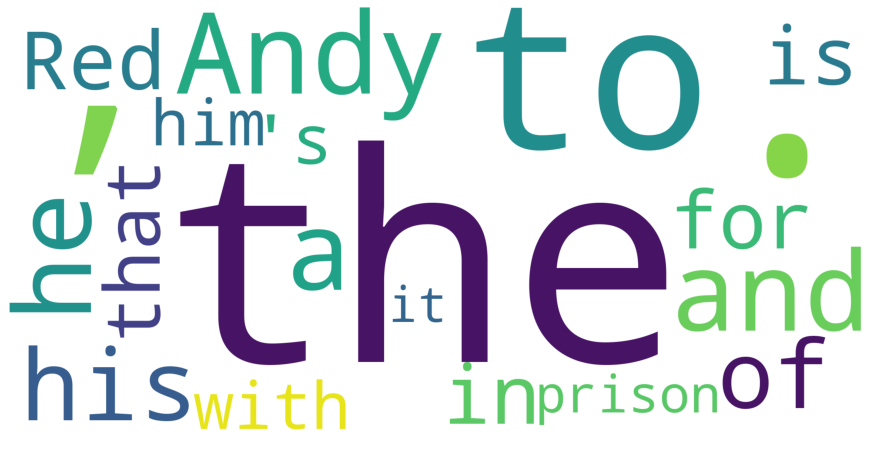

In [13]:
word_cloud = WordCloud(background_color="white", width=2000, height=1000,).generate_from_frequencies(common_tokens)
plt.rcParams["figure.figsize"] = (16, 8)
plt.axis("off")
plt.imshow(word_cloud)

Man kann erkennen, dass es sich bei den 20 am häufigsten verwendeten Wörtern vor allem um Satzzeichen, Stoppwörter und Eigennamen handelt. Da es sich bei Stopwörtern und Satzzeichen jedoch um inhaltlich irrelevante Informationen handelt, können wir daraus keinen großen Mehrwert ziehen. Eine Reduzierung der Token wird benötigt.

Wir verfahren analog wie zuvor und erstellen eine Liste aller Token unseres Textes ignorieren jedoch alle Stoppwörter und Satzzeichen.

In [14]:
# Alle Wörter in Liste speichern
words = [token.text for token in document if not token.is_stop and not token.is_punct]
# Worthäufigkeit berechnen
counters = Counter(words)

In [15]:
# Neues DataFrame erstellen
frequency = pd.DataFrame(columns=['Frequency'])
# Häufigkeit der Token zuweisen
frequency['Frequency'] = pd.Series(counters)

In [16]:
common_words = dict(Counter(words).most_common(20))

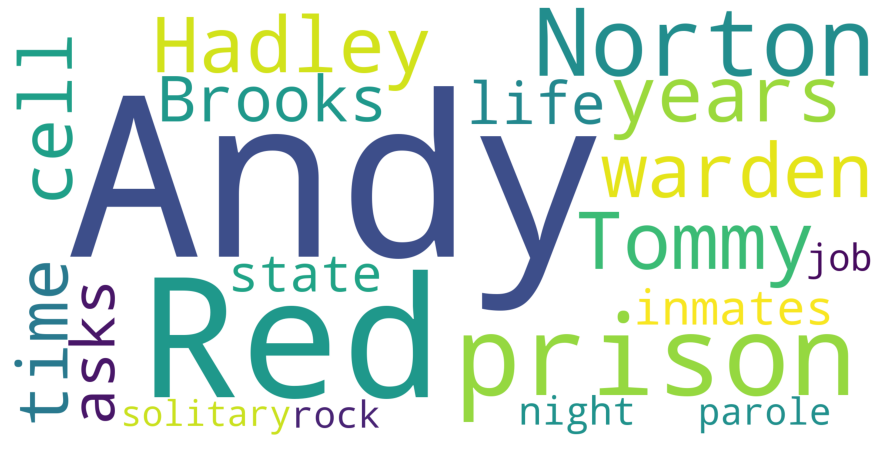

In [17]:
word_cloud = WordCloud(background_color="white", width=2000, height=1000,).generate_from_frequencies(common_words)
plt.rcParams["figure.figsize"] = (16, 8)
plt.axis("off")
plt.imshow(word_cloud)

Man kann erkennen, dass es sich bei den relevanten Wörtern um deutlich inhaltsbezogenere Informationen handelt. Eigennamen sind ebenfalls noch sehr präsent, geben jedoch nur Auskunft über Figuren, Schauspieler und deren Beziehungen im Film. Im nächsten Schritt entfernen wir auch diese aus unseren Daten. 

Neben Eigennamen entfernen wir ebenfalls alle Verben, da diese, gerade in lemmatisierter Form, zu häufig in allen Filmzusammenfassungen vorkommen werden und somit nur ein generelles Clustern der Daten erlauben.

In [18]:
# Eigennamen identifizieren
entities = sorted(set([entity.text for entity in document.ents]))
# Token auf Wörter ohne Eigennamen, Stoppwörter, Satzzeichen, Verben reduzieren
words = [str(token.lemma_).lower() for token in document if not token.ent_type_ and not token.is_stop and not token.is_punct and token.pos_ != 'VERB']
# Worthäufigkeit berechnen
counters = Counter(words)

In [19]:
# Neues DataFrame erstellen
frequency = pd.DataFrame(columns=['Frequency'])
# Häufigkeit der Token zuweisen
frequency['Frequency'] = pd.Series(counters)

In [20]:
common_words = dict(Counter(words).most_common(20))

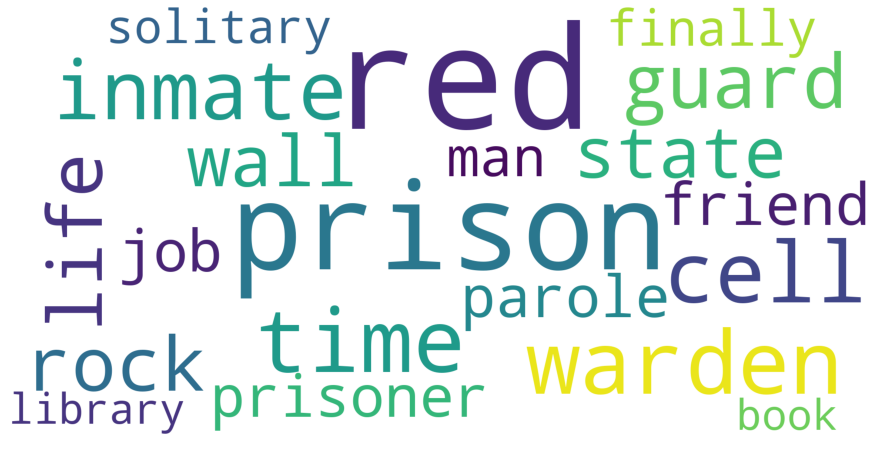

In [21]:
word_cloud = WordCloud(background_color="white", width=2000, height=1000,).generate_from_frequencies(common_words)
plt.rcParams["figure.figsize"] = (16, 8)
plt.axis("off")
plt.imshow(word_cloud)

Basierend auf diesen reduzierten Daten, welche zum Großteil aus Substantiven und Adjektiven bestehen, sollte eine inhaltliche Analyse möglich sein. Wir können beispielsweise erkennen, dass es sich bei dem Film *Die Verurteilten*, um einen Film handelt, der sich mit einem Männergefängnis, Insassen, Wächtern und Einzelhaft beschäftigt. Fälschlicherweise erkennt spaCy *Red* des Öfteren als Adjektiv und nicht als Spitznamen einer Rolle. Betrachtet man die Merkmal aller Token, dessen Text *Red* ist, so kann man erkennen, dass spaCy erstaunlicherweise *Red* ebenfalls als Person erkennt.

In [22]:
tokens.loc[tokens["Text"] == "Red"]

,Text,Lemma,POS,Shape,Alpha,Stop,Entity
87,Red,Red,PROPN,Xxx,True,False,
110,Red,Red,PROPN,Xxx,True,False,ORG
124,Red,Red,PROPN,Xxx,True,False,
153,Red,Red,PROPN,Xxx,True,False,
175,Red,red,ADJ,Xxx,True,False,
311,Red,Red,PROPN,Xxx,True,False,
323,Red,Red,PROPN,Xxx,True,False,
346,Red,Red,PROPN,Xxx,True,False,
359,Red,Red,PROPN,Xxx,True,False,
416,Red,Red,PROPN,Xxx,True,False,


## Eigennamen

Spacey verfügt des Weiteren über Schnittstellen zur Identifizierung der Typen von Eigennamen, welche wir zwar nicht für unsere inhaltliche Analyse weiter betrachten, jedoch beispielsweise in einer späteren Optimierung hinzuziehen könnten. Mit der integrierten `render()` Methode lassen sich Eigennamen im Text hervorheben. Dessen Typen werden ebenfalls dargestellt.

In [23]:
spacy.displacy.render(document, style="ent", jupyter=True)

Man könnte somit auch beispielsweise Personen, Orte und Zeiten identifizieren.

### Personen

Beinhalten Schauspieler, Rollen, Spitznamen.

In [24]:
set([token.text for token in document.ents if token.label_ == 'PERSON'])

{'Andy',
 'Andy Dufresne',
 'Bible',
 'Bob Gunton',
 'Boggs',
 'Brooks',
 'Brooks Hatlen',
 'Byron Hadley',
 'Clancy Brown',
 'Ellis Boyd Redding',
 'Gil Bellows',
 'Hadley',
 'Heywood',
 'James Whitmore',
 'Marilyn Monroe',
 'Mark Rolston',
 'Mozart',
 'Randall Stephens',
 'Raquel Welch',
 'Red',
 'Rita Hayworth',
 'Shawshank Prison',
 'Tim Robbins',
 'Tommy',
 'Warden Norton',
 "Warden Norton's",
 'Warden Samuel Norton',
 'William Sadler',
 'Zihuatanejo',
 'hammer'}

### Orte

Ermöglichen Rückschlüsse auf Schauplätze und Drehorte.

In [25]:
set([token.text for token in document.ents if token.label_ == 'GPE'])

{'Buxton',
 'Fort Hancock',
 'Haywood',
 'Maine',
 'Mexico',
 'Portland',
 'Red',
 'Texas',
 'Zihuatanejo'}

### Zeiten

Ermöglichen Rückschlüsse in welchem Jahrzehnt beispielsweise die Geschichte spielt und welche Zeitintervalle vorkommen.

In [26]:
set([token.text for token in document.ents if token.label_ == 'DATE'])

{'10 years',
 '13 years old',
 '1947',
 '1965',
 '1967',
 '20 years',
 '30 years',
 '50 years',
 'About a month later',
 'About four years',
 'a month',
 'a week',
 'almost 20 years',
 'another month',
 'every week',
 "lays within''",
 'ten years earlier',
 'the first two years',
 'the years',
 'two weeks',
 'years'}

## Fazit

Eine Analyse der Zusammenfassung des Films: Die Verurteilten mit Python, Pandas und spaCy ermöglicht eine Analyse und Reduzierung der Textdaten auf inhaltlich relevante Informationen. Im folgenden Kapitel soll nun eine Verarbeitung aller Dateneinträge angewendet werden, sowie eine Analyse genereller Information erfolgen.

* [Weiter zu: Verarbeitung aller Dateneinträge](./3_nlp_preprocessing_schlaak_weise.ipynb)
* [Zurück zur Übersicht](./0_nlp_intro_schlaak_weise.ipynb)